# Portfolio

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from numba import jit

In [2]:
from datetime import datetime
today=datetime.today().strftime('%Y-%m-%d')

In [3]:
tickers_list = ['JPM','AAPL','TSLA', 'NTDOY','AMD','MMM','A','AAL','B','GNUS','F','FB','K','MSFT','GLD']
tickers_list=sorted(tickers_list)
tickers_list

['A',
 'AAL',
 'AAPL',
 'AMD',
 'B',
 'F',
 'FB',
 'GLD',
 'GNUS',
 'JPM',
 'K',
 'MMM',
 'MSFT',
 'NTDOY',
 'TSLA']

In [4]:
n=len(tickers_list)

[*********************100%***********************]  15 of 15 completed


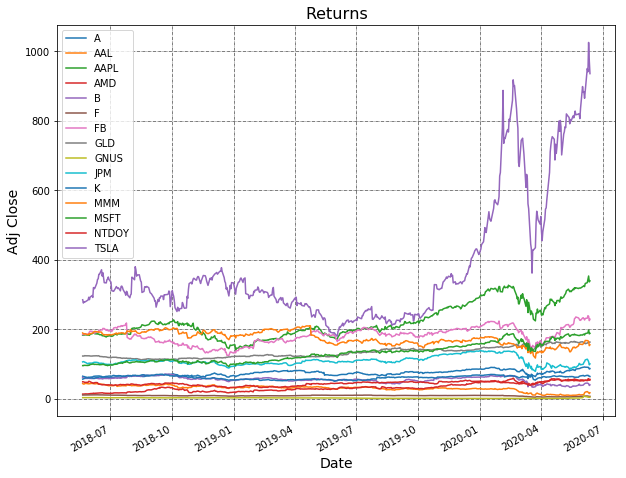

In [5]:
# Get the data for the stock AAPL
data = yf.download(tickers_list,'2018-05-20',today)
(data['Adj Close']).plot(figsize=(10,8),linestyle='-')
plt.title('Returns', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adj Close',fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.legend()
plt.show()

We will choose only dates after the corona crash.

[*********************100%***********************]  15 of 15 completed


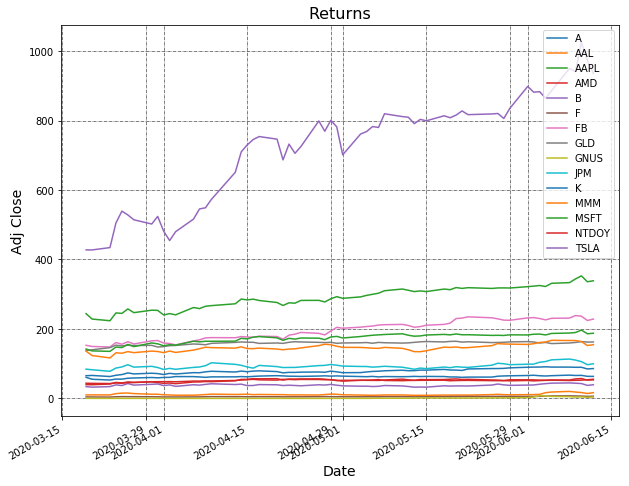

In [6]:
# Get the data for the stock AAPL
data = yf.download(tickers_list,'2020-03-20',today)
(data['Adj Close']).plot(figsize=(10,8),linestyle='-')
plt.title('Returns', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adj Close',fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.legend()
plt.show()

In [7]:
d=yf.download(tickers_list,'2020-03-20',today,interval='1d')
mdata=d['Adj Close'].dropna()

[*********************100%***********************]  15 of 15 completed


Next up we calculate the expected return that 14 days would give us:

In [8]:
mreturn=mdata.pct_change()
avg_return=mreturn.multiply(14/mdata.index.to_series().diff().dt.days, axis="index")

In [9]:
avg_mean=avg_return.mean()
avg_mean

A        0.058674
AAL      0.174795
AAPL     0.057957
AMD      0.028576
B       -0.006925
F        0.092620
FB       0.077678
GLD      0.026876
GNUS     0.863898
JPM      0.033734
K        0.009753
MMM      0.016680
MSFT     0.047158
NTDOY    0.047308
TSLA     0.116242
dtype: float64

In [10]:
avg_var=avg_return.var()
avg_var

A         0.115436
AAL       1.829339
AAPL      0.126081
AMD       0.226765
B         0.583712
F         0.511224
FB        0.143898
GLD       0.030733
GNUS     10.237582
JPM       0.294227
K         0.083851
MMM       0.167103
MSFT      0.119962
NTDOY     0.062038
TSLA      0.369574
dtype: float64

### Covariance Matrix

In [11]:
covar=avg_return.cov()
covar

,A,AAL,AAPL,AMD,B,F,FB,GLD,GNUS,JPM,K,MMM,MSFT,NTDOY,TSLA
A,0.115436,0.182696,0.081318,0.103434,0.184846,0.113347,0.069533,0.021733,0.133626,0.116117,0.025656,0.075895,0.087592,0.014079,0.088175
AAL,0.182696,1.829339,0.183845,0.174362,0.595152,0.752018,0.165180,0.039627,0.109845,0.487841,0.049159,0.308931,0.149811,0.044706,0.290896
AAPL,0.081318,0.183845,0.126081,0.123814,0.188536,0.136131,0.106929,0.019267,0.058933,0.107951,0.047340,0.107912,0.113412,0.021128,0.124744
AMD,0.103434,0.174362,0.123814,0.226765,0.212080,0.152314,0.113721,0.042219,-0.041574,0.105170,0.037315,0.118974,0.126350,0.018789,0.148772
B,0.184846,0.595152,0.188536,0.212080,0.583712,0.340592,0.172817,0.030049,0.265241,0.340321,0.066184,0.232373,0.186331,0.038451,0.154648
F,0.113347,0.752018,0.136131,0.152314,0.340592,0.511224,0.117444,0.019800,0.033949,0.300692,0.059437,0.217017,0.110670,0.001233,0.215927
FB,0.069533,0.165180,0.106929,0.113721,0.172817,0.117444,0.143898,0.016822,-0.021940,0.105163,0.019671,0.086351,0.102288,0.006450,0.104232
GLD,0.021733,0.039627,0.019267,0.042219,0.030049,0.019800,0.016822,0.030733,-0.032417,0.019374,0.007769,0.015834,0.022522,0.012059,0.021561
GNUS,0.133626,0.109845,0.058933,-0.041574,0.265241,0.033949,-0.021940,-0.032417,10.237582,0.266509,0.035175,0.062172,0.099568,0.089459,-0.044530
JPM,0.116117,0.487841,0.107951,0.105170,0.340321,0.300692,0.105163,0.019374,0.266509,0.294227,0.050126,0.155962,0.103060,0.008571,0.109112


In [12]:
np_covar=covar.values

In [13]:
def exp_return(alpha):
    return alpha @ np.transpose(avg_mean.values)

In [14]:
def variance(alpha):
    term1=0
    term2=0
    for i in range(len(alpha)):        
        for j in range(len(alpha)):
            if i!=j:
                term2+=alpha[i]*alpha[j]*np_covar[i,j]
            else:
                term1+=(alpha[i]**2)*np_covar[i,i]
    return term1+term2

In [15]:
def constraint(alpha):
    s=sum(alpha)
    return 1-s

con1=[{'type': 'eq','fun': constraint}]

In [16]:
def boundairies(N):
    lijst=[]
    b=(0,1)
    return [b for x in range(N)]

In [17]:
def alpha0(N):
    return np.array([1/N for x in range(N)])

In [18]:
weight0=alpha0(n)

In [19]:
sol=minimize(variance, weight0, constraints=con1,bounds=boundairies(n))
sol

     fun: 0.021415131972734328
     jac: array([0.04677469, 0.09858498, 0.05912002, 0.07929306, 0.09299596,
       0.05610038, 0.04333176, 0.04283921, 0.04359225, 0.05487546,
       0.04242963, 0.05973097, 0.06150561, 0.04301137, 0.04632835])
 message: 'Optimization terminated successfully.'
    nfev: 170
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.54160433e-17,
       2.37843966e-18, 9.91435742e-18, 5.30394777e-02, 5.33132632e-01,
       1.30200195e-03, 0.00000000e+00, 1.84049186e-01, 0.00000000e+00,
       0.00000000e+00, 2.28476703e-01, 0.00000000e+00])

In [20]:
sum(sol.x)

1.0000000000000002

In [21]:
expected_return=(sol.x)@(np.transpose(avg_mean.values))
expected_return

0.03217731881232612

In [22]:
min_var= sol.fun
min_var

0.021415131972734328

In [23]:
print('Weights distribution with least amount of risk')

for item_a, item_b in zip(tickers_list, sol.x):
    print(item_a, round((round(item_b,3)*100),3))


print('')
print( 'Expected return:' ,'%.1f' %  round(round(float(expected_return),3)*100,3), '%' )
print('Variance:' , round(min_var,3), '%')

Weights distribution with least amount of risk
A 0.0
AAL 0.0
AAPL 0.0
AMD 0.0
B 0.0
F 0.0
FB 5.3
GLD 53.3
GNUS 0.1
JPM 0.0
K 18.4
MMM 0.0
MSFT 0.0
NTDOY 22.8
TSLA 0.0

Expected return: 3.2 %
Variance: 0.021 %


In [24]:
import random

In [25]:
@jit(nopython=True)
def rand_port(size_w):
    array=np.arange(size_w)
    for i in array:
        array[i]=random.randint(0,100)
    array=array/np.sum(array)
    return array

In [26]:
def scatter_port(N,size_w):
    for i in range(N):
        if i ==0:
            w=rand_port(size_w)
        else:
            x=rand_port(size_w)
            w=np.vstack((w,x))
    return w#[1:,:]

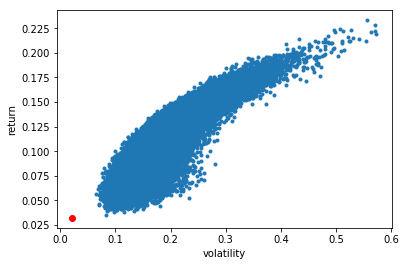

In [27]:
N=40000
portfolios=scatter_port(N,len(weight0))
R=np.zeros(len(portfolios))
V=np.zeros(len(portfolios))
k=0
for i in portfolios:
    R[k]=exp_return(i)
    V[k]=variance(i)
    k+=1
    
plt.plot(V,R,'.')
# plt.plot(0.2,exp_return(s.x),'ro')
plt.plot(min_var, expected_return,'ro')
plt.xlabel('volatility')
plt.ylabel('return')
plt.show()  

In [28]:
def exp_return2(alpha):
    return -(alpha @ np.transpose(avg_mean.values))

In [29]:
def constraint1(alpha):
    s=sum(alpha)
    return s-1

cons1={'type': 'eq','fun': constraint1}

In [30]:
def constraint2(alpha):
    return variance(alpha)-0.2

cons2={'type': 'eq','fun': constraint2}
cons=[cons1, cons2]

In [31]:
s=minimize(exp_return2, weight0, constraints=cons, bounds=boundairies(len(weight0)))

s

     fun: -0.16916113730118298
     jac: array([-0.05867407, -0.17479485, -0.05795662, -0.02857568,  0.00692538,
       -0.09262006, -0.07767825, -0.02687639, -0.86389815, -0.03373409,
       -0.00975304, -0.01667998, -0.04715841, -0.04730805, -0.11624159])
 message: 'Optimization terminated successfully.'
    nfev: 272
     nit: 16
    njev: 16
  status: 0
 success: True
       x: array([0.00000000e+00, 3.26206691e-02, 6.36653119e-17, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.95821792e-01, 1.47939416e-17,
       1.11978253e-01, 4.85543995e-17, 2.56523463e-17, 0.00000000e+00,
       0.00000000e+00, 3.09049789e-01, 2.50529496e-01])

In [32]:
v=np.linspace(min_var,min_var+0.6,100)

In [33]:
vector_r=np.zeros(len(v))
vector_v=np.zeros(len(v))

for i in range(len(vector_v)):
    def constraint2(alpha):
        return variance(alpha)-v[i]

    cons2={'type': 'eq','fun': constraint2}
    cons=[cons1, cons2]

    s=minimize(exp_return2, weight0, constraints=cons, bounds=boundairies(len(weight0)))
    
    vector_r[i]=-s.fun
    vector_v[i]=variance(s.x)

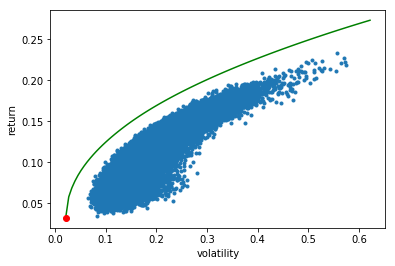

In [34]:
plt.plot(vector_v,vector_r,'g')
plt.plot(V,R,'.')

plt.plot(min_var, expected_return,'ro')
plt.xlim()
plt.xlabel('volatility')
plt.ylabel('return')
plt.show()  

From the looks of this graph we want a point with variance arround 0.1. The reason that the blue points do not come close to the green line is that with 15 different options it has 100^15 different possibilities of making a portfolio if you only consider natural integers as percentages.

In [60]:
def constraint2(alpha):
    return variance(alpha)-0.1

cons2={'type': 'eq','fun': constraint2}
cons=[cons1, cons2]

P=minimize(exp_return2, weight0, constraints=cons, bounds=boundairies(len(weight0)))

portfolio=P.x
P_x2=variance(portfolio)
P_y2=-P.fun

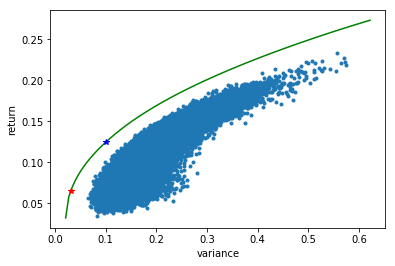

In [62]:
plt.plot(vector_v,vector_r,'g')
plt.plot(V,R,'.')
plt.plot(P_x, P_y,'r*')
plt.plot(P_x2, P_y2,'b*')
plt.xlim()
plt.xlabel('variance')
plt.ylabel('return')
plt.show()  

When choosing a portfolio we discussed the blue and the red star. We eventually chose for the bleu one for the simple reasoning that for 3 times less of the variance we only we get a redaction of half the return. Als the red star is the most dented point of the graph. After this point is is less advantegous to risk a higher variance.

In [63]:
print('Weights distribution of the optimal portfolio')

for item_a, item_b in zip(tickers_list, sol.x):
    print(item_a, round((round(item_b,3)*100),3))


print('')
print( 'Expected return:' ,'%.1f' %  round(round(float(P_y),3)*100,3), '%' )
print('Variance:' , round(P_x,3), '%')

Weights distribution of the optimal portfolio
A 0.0
AAL 0.0
AAPL 0.0
AMD 0.0
B 0.0
F 0.0
FB 5.3
GLD 53.3
GNUS 0.1
JPM 0.0
K 18.4
MMM 0.0
MSFT 0.0
NTDOY 22.8
TSLA 0.0

Expected return: 6.5 %
Variance: 0.031 %
